In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
shared_folder = '/content/drive/Shared drives/IST 407 Project/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# CRIME DATA (dataframe name = crime_df)

file_name = 'NYPD_Complaint_Data_Historic_20231112.csv'
file_path = (shared_folder + file_name)

chunk_size = 200000
crime_df = pd.DataFrame()

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    crime_df = pd.concat([crime_df, chunk], ignore_index=True)

In [77]:
#Columns
print(crime_df.shape)
print(crime_df.columns)

(8353049, 35)
Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')


In [78]:
crime_df.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,10600119,01/01/2002,11:00:00,02/25/2006,11:00:00,NaN,03/06/2006,104,RAPE,157.0,...,M,NaN,NaN,NaN,NaN,(null),(null),18-24,WHITE,F
1,11052575,04/22/2005,02:00:00,NaN,(null),NaN,04/22/2006,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),25-44,BLACK,M
2,10832306,07/11/2005,20:00:00,03/29/2006,12:00:00,NaN,03/29/2006,353,UNAUTHORIZED USE OF A VEHICLE,462.0,...,M,NaN,NaN,NaN,NaN,(null),(null),45-64,WHITE,M
3,10107192,10/19/2005,20:30:00,NaN,(null),NaN,01/13/2006,126,MISCELLANEOUS PENAL LAW,461.0,...,F,NaN,NaN,NaN,NaN,(null),(null),25-44,BLACK,F
4,23893731,12/04/2005,09:00:00,08/09/2006,17:00:00,NaN,08/09/2006,109,GRAND LARCENY,405.0,...,(null),NaN,NaN,NaN,NaN,(null),(null),25-44,WHITE,F


In [79]:
crime_copy = crime_df.copy()

In [74]:
#crime_df = crime_copy

In [80]:
print(crime_df.shape)

(8353049, 35)


In [81]:
crime_df = crime_df[~crime_df['PREM_TYP_DESC'].str.contains('RESIDENCE')]
print(crime_df.shape)

(5118158, 35)


In [82]:
crime_df = crime_df[~crime_df['PREM_TYP_DESC'].str.contains('(null)')]
print(crime_df.shape)

<ipython-input-82-babb21451fa1>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crime_df = crime_df[~crime_df['PREM_TYP_DESC'].str.contains('(null)')]


(5103671, 35)


In [83]:
value_to_keep = 'COMPLETED'
crime_df = crime_df[crime_df['CRM_ATPT_CPTD_CD'] == value_to_keep]
print(crime_df.shape)

(5013296, 35)


In [84]:
crime_df.LAW_CAT_CD.value_counts()

MISDEMEANOR    2984973
FELONY         1568594
VIOLATION       459729
Name: LAW_CAT_CD, dtype: int64

In [85]:
crime_df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
17,10361314,02/11/2006,16:35:00,NaN,(null),79.0,02/11/2006,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,(null),NaN,40.689001,-73.945027,"(40.68900139556, -73.9450265328727)",PATROL BORO BKLYN NORTH,(null),45-64,BLACK,F
18,10363948,02/11/2006,17:15:00,NaN,(null),83.0,02/11/2006,578,HARRASSMENT 2,638.0,...,M,NaN,40.698474,-73.917769,"(40.6984738177025, -73.917768981221)",PATROL BORO BKLYN NORTH,(null),18-24,BLACK,F
44,16939015,05/30/2006,19:00:00,NaN,(null),44.0,06/29/2006,104,RAPE,157.0,...,M,NaN,40.837842,-73.919628,"(40.8378421209284, -73.9196277517392)",PATROL BORO BRONX,(null),<18,BLACK,F
45,27139650,12/15/2006,21:12:00,NaN,(null),83.0,02/27/2007,114,ARSON,263.0,...,(null),NaN,40.698474,-73.917769,"(40.6984738177025, -73.917768981221)",PATROL BORO BKLYN NORTH,(null),(null),UNKNOWN,M
48,45954344,04/24/2008,17:45:00,NaN,(null),52.0,04/24/2008,109,GRAND LARCENY,419.0,...,M,NaN,40.869470,-73.879861,"(40.8694704770483, -73.8798608037303)",PATROL BORO BRONX,(null),18-24,BLACK,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353041,261176776,12/31/2022,17:47:00,12/31/2022,17:57:00,48.0,12/31/2022,341,PETIT LARCENY,333.0,...,(null),NaN,40.855379,-73.887220,"(40.855379, -73.88722)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,D
8353042,261125871,12/30/2022,01:40:00,12/30/2022,01:43:00,73.0,12/30/2022,578,HARRASSMENT 2,638.0,...,M,NaN,40.669193,-73.909639,"(40.669193, -73.909639)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F
8353044,261171983,12/30/2022,12:31:00,NaN,(null),106.0,12/31/2022,341,PETIT LARCENY,349.0,...,U,NaN,40.675259,-73.854501,"(40.67525903, -73.85450113)",PATROL BORO QUEENS SOUTH,(null),25-44,ASIAN / PACIFIC ISLANDER,F
8353046,261147482,12/30/2022,17:20:00,12/30/2022,17:28:00,17.0,12/30/2022,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.761265,-73.968887,"(40.761265, -73.968887)",PATROL BORO MAN SOUTH,(null),25-44,BLACK,M


In [12]:
crime_df.to_csv('crime_data.csv', index=False)

In [14]:
summary_stats = crime_df.describe()
print(summary_stats)

         ADDR_PCT_CD          KY_CD          PD_CD  JURISDICTION_CODE  \
count  230753.000000  230753.000000  230752.000000      230753.000000   
mean       61.182047     277.827920     418.476195           0.599776   
std        35.895264     143.314976     204.759251           6.450111   
min         1.000000     101.000000     101.000000           0.000000   
25%        30.000000     110.000000     267.000000           0.000000   
50%        61.000000     341.000000     397.000000           0.000000   
75%        94.000000     348.000000     567.000000           0.000000   
max       123.000000     685.000000     922.000000          97.000000   

         X_COORD_CD     Y_COORD_CD  TRANSIT_DISTRICT       Latitude  \
count  2.307530e+05  230753.000000       6595.000000  230753.000000   
mean   1.003363e+06  207115.749988         13.588324      40.735124   
std    2.095889e+04   29077.129679         12.748990       0.079810   
min    9.148030e+05  125922.000000          1.000000      

In [15]:
crime_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5013296 entries, 17 to 8353047
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         object 
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  int64  
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX         

In [15]:
# BUSINESS DATA (dataframe name = biz_df)

file_name = 'Legally_Operating_Businesses_20231112.csv'
file_path = (shared_folder + file_name)

chunk_size = 50000
biz_df = pd.DataFrame()

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    biz_df = pd.concat([biz_df, chunk], ignore_index=True)

In [16]:
biz_df

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location
0,0967332-DCA,Business,02/28/2017,Inactive,02/04/2010,Home Improvement Contractor,"BARBARINO, JOHN JR.",JOHN BARBARINO JR_HOME IMPROVEMENT,239,MEDFORD CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2103411-DCA,Individual,03/31/2024,Active,01/11/2022,Sightseeing Guide,"Nieciak, Joseph",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2060087-DCA,Individual,03/31/2024,Active,10/31/2017,Sightseeing Guide,"Arcaro, Tyler",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2078026-DCA,Individual,03/31/2024,Active,09/11/2018,Sightseeing Guide,"HESSE, DAPHNEE",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2057801-DCA,Individual,02/28/2019,Inactive,09/01/2017,Home Improvement Salesperson,"ESCOBAR, KEVIN",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281408,2115029-DCA,Business,12/31/2024,Active,07/12/2023,Electronics Store,GALAXY LATINO GIFT SHOP CORP,NaN,4104,5TH AVE,...,307.0,38.0,3010746,3007190041,NaN,NaN,NaN,-74.005189,40.650050,"(40.65004958074599, -74.00518940278018)"
281409,1416463-DCA,Business,12/31/2024,Active,12/26/2011,Electronics Store,"FAMILY DOLLAR STORES OF NEW YORK, INC.",NaN,1165A,BROADWAY,...,304.0,34.0,3387789,3032520003,NaN,NaN,NaN,NaN,NaN,NaN
281410,0893326-DCA,Business,07/31/2025,Active,06/11/2003,Secondhand Dealer - General,1672 62ND STREET R & J COLLISION INC.,NaN,1672,62ND ST,...,311.0,43.0,3132716,3055310036,NaN,NaN,NaN,-73.991506,40.622725,"(40.6227250292715, -73.99150583174155)"
281411,1016863-DCA,Individual,05/31/2013,Inactive,02/20/2012,Locksmith,"ENNAB, AIMAN C",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
biz_df["License Type"].value_counts()

Business      186949
Individual     94464
Name: License Type, dtype: int64

In [69]:
value_counts_license_type = biz_df[biz_df['Longitude'].isna()]['License Type'].value_counts()
value_counts_license_type

Individual    94464
Business      10417
Name: License Type, dtype: int64

In [70]:
nan_count_longitude = biz_df['Longitude'].isna().sum()
nan_count_longitude

104881

In [21]:
print(biz_df.columns)

Index(['DCA License Number', 'License Type', 'License Expiration Date',
       'License Status', 'License Creation Date', 'Industry', 'Business Name',
       'Business Name 2', 'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Address ZIP', 'Contact Phone Number', 'Address Borough',
       'Borough Code', 'Community Board', 'Council District', 'BIN', 'BBL',
       'NTA', 'Census Tract', 'Detail', 'Longitude', 'Latitude', 'Location'],
      dtype='object')


In [22]:
biz_df['Latitude'].nunique()

77078

In [23]:
biz_df['Longitude'].nunique()

77078

In [24]:
biz_df.Industry.value_counts()

Home Improvement Contractor     42213
Home Improvement Salesperson    41033
Tobacco Retail Dealer           39736
Secondhand Dealer - General     17204
Electronics Store               15319
                                ...  
Construction Labor Provider        29
Ticket Seller Business             29
Booting Company                    23
Commercial Lessor                  21
Secondhand Dealer - Firearms       12
Name: Industry, Length: 61, dtype: int64

In [25]:
cleaned_df = biz_df.dropna(subset=['Longitude', 'Latitude'])
print(cleaned_df.shape)
# Displaying the first few rows of the cleaned dataframe
cleaned_df.head()
#cleaned_df["License Type"].value_counts()

(176532, 27)


,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location
18,0365714-DCA,Business,03/31/2005,Inactive,04/08/1997,Garage,THE GARDENS 75TH STREET OWNERS CORP.,NaN,3538,75TH ST,...,403.0,25.0,4029562,4012740020,QN28,289.0,"Vehicle Spaces: 85, Bicycle Spaces:",-73.891136,40.750745,"(40.75074488262595, -73.89113569640881)"
19,1076184-DCA,Business,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",SUNRISE DELICATESSEN,2017,CHURCH AVE,...,314.0,40.0,3116556,3050810039,BK42,50801.0,NaN,-73.960737,40.650123,"(40.6501225946322, -73.96073707845565)"
23,2061591-DCA,Business,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,NaN,6914,4TH AVE,...,310.0,43.0,3145701,3058720047,BK31,68.0,Laundry Type: Retail Laundry,-74.023621,40.634397,"(40.63439650603149, -74.02362065616948)"
24,2009334-DCA,Business,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,SEL ROSE,1,DELANCEY ST,...,103.0,1.0,1005662,1004240012,MN27,18.0,Sidewalk Cafe Type: Regular Unenclosed/Small U...,-73.993820,40.720242,"(40.720241568328824, -73.99382027141543)"
26,2038840-DCA,Business,07/31/2021,Inactive,06/09/2016,Secondhand Dealer - General,MD BROADWAY ELECTRONICS LLC,NaN,1888,JEROME AVE,...,205.0,14.0,2013962,2031790031,NaN,NaN,NaN,-73.906078,40.855206,"(40.85520587133494, -73.90607848934312)"


In [26]:
### NEW GRID CELLS APPROACH
grid_df = cleaned_df.copy()
# Define the grid size
grid_size = 100

# Determine the range from the crime data
lat_min, lat_max = crime_df['Latitude'].min(), crime_df['Latitude'].max()
lon_min, lon_max = crime_df['Longitude'].min(), crime_df['Longitude'].max()

# Define a function to assign to grid cells
def assign_to_grid(lat, lon, lat_min, lon_min, lat_step, lon_step):
    if lat < lat_min or lat > lat_max or lon < lon_min or lon > lon_max:
        return None  # Excludes points outside the crime data range
    lat_cell = int((lat - lat_min) // lat_step)
    lon_cell = int((lon - lon_min) // lon_step)
    return f'({lat_cell}, {lon_cell})'

# Calculate the step size for each grid cell
lat_step = (lat_max - lat_min) / grid_size
lon_step = (lon_max - lon_min) / grid_size

# Apply the grid cells to the business data
grid_df['grid_cell'] = grid_df.apply(lambda row: assign_to_grid(row['Latitude'], row['Longitude'], lat_min, lon_min, lat_step, lon_step), axis=1)

# Drop businesses that do not fit into any grid cell
grid_df = grid_df.dropna(subset=['grid_cell'])
print(grid_df.grid_cell.value_counts())
print(grid_df.grid_cell.nunique())
print(grid_df.shape)

(65, 52)    1174
(54, 49)     557
(65, 81)     543
(53, 49)     507
(63, 73)     463
            ... 
(20, 52)       1
(18, 50)       1
(40, 77)       1
(29, 25)       1
(83, 79)       1
Name: grid_cell, Length: 3458, dtype: int64
3458
(163769, 28)


In [27]:
# Counting the number of businesses in each grid cell
grid_cell_counts = grid_df['grid_cell'].value_counts().reset_index()
grid_cell_counts.columns = ['Grid_Cell', 'Business_Count']

grid_cell_counts.head(10)

,Grid_Cell,Business_Count
0,"(65, 52)",1174
1,"(54, 49)",557
2,"(65, 81)",543
3,"(53, 49)",507
4,"(63, 73)",463
5,"(63, 50)",462
6,"(64, 50)",441
7,"(66, 81)",431
8,"(62, 69)",428
9,"(62, 50)",422


from matplotlib import pyplot as plt
_df_0['Business_Count'].plot(kind='hist', bins=20, title='Business_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Business_Count'].plot(kind='line', figsize=(8, 4), title='Business_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

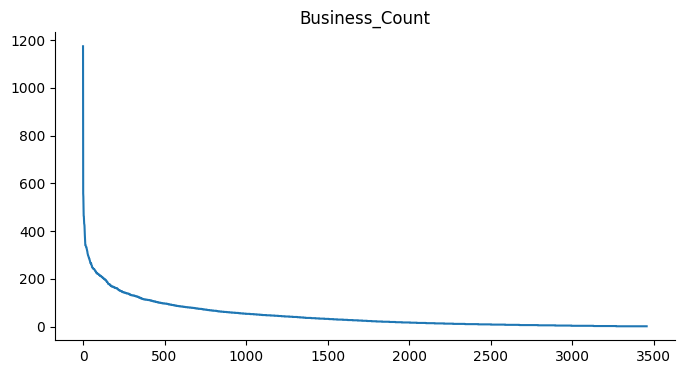

In [30]:
from matplotlib import pyplot as plt
grid_cell_counts['Business_Count'].plot(kind='line', figsize=(8, 4), title='Business_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

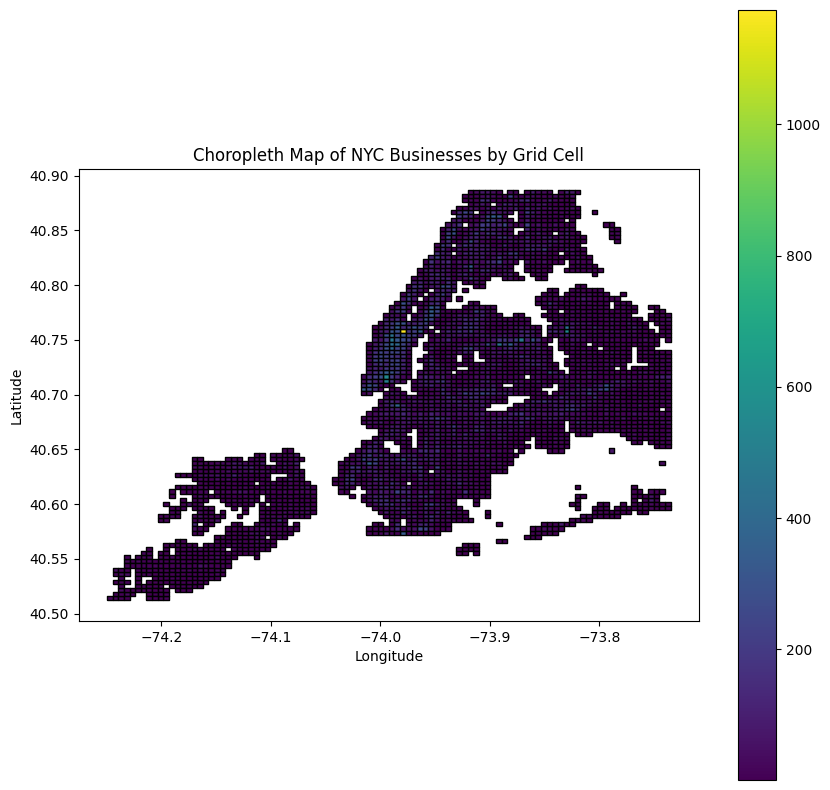

In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Assuming grid_cell_counts is your DataFrame with the grid cells and business counts
# And assuming you have the lat_min, lat_max, lon_min, lon_max, and grid_size from the earlier grid creation

# Calculate the step size for each grid cell
lat_step = (lat_max - lat_min) / grid_size
lon_step = (lon_max - lon_min) / grid_size

# Function to convert grid cell back to geographic coordinates
def grid_to_geom(grid_cell, lat_min, lon_min, lat_step, lon_step):
    lat_cell, lon_cell = map(int, grid_cell.strip('()').split(', '))
    return Polygon([
        (lon_min + lon_cell * lon_step, lat_min + lat_cell * lat_step),
        (lon_min + (lon_cell + 1) * lon_step, lat_min + lat_cell * lat_step),
        (lon_min + (lon_cell + 1) * lon_step, lat_min + (lat_cell + 1) * lat_step),
        (lon_min + lon_cell * lon_step, lat_min + (lat_cell + 1) * lat_step)
    ])

# Create a GeoDataFrame
geometry = [grid_to_geom(cell, lat_min, lon_min, lat_step, lon_step) for cell in grid_cell_counts['Grid_Cell']]
gdf = gpd.GeoDataFrame(grid_cell_counts, geometry=geometry)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Business_Count', ax=ax, legend=True, cmap='viridis', edgecolor='black')
plt.title('Choropleth Map of NYC Businesses by Grid Cell')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [86]:
crime_df.shape

(5013296, 35)

In [87]:
clean_crime_df = crime_df.drop(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM','RPT_DT','PD_DESC', 'CRM_ATPT_CPTD_CD', 'BORO_NM','JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD','TRANSIT_DISTRICT','Lat_Lon', 'PATROL_BORO',
       'STATION_NAME','PD_CD','SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX','VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX','KY_CD',
       'ADDR_PCT_CD'], axis=1)
print(clean_crime_df.LOC_OF_OCCUR_DESC.value_counts())
print(clean_crime_df.PREM_TYP_DESC.value_counts())
print(clean_crime_df.shape)
clean_crime_df

INSIDE         1662877
(null)         1642386
FRONT OF       1437231
OPPOSITE OF     186767
REAR OF          83526
OUTSIDE            283
Name: LOC_OF_OCCUR_DESC, dtype: int64
STREET                       2589415
OTHER                         222727
CHAIN STORE                   213084
COMMERCIAL BUILDING           210239
TRANSIT - NYC SUBWAY          177162
                              ...   
SOCIAL CLUB/POLICY LOCATI          7
BEAUTY/NAIL SALON                  5
SUPERMARKET                        4
JEWELRY STORE                      1
DEPT STORE                         1
Name: PREM_TYP_DESC, Length: 83, dtype: int64
(5013296, 6)


,OFNS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Latitude,Longitude
17,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,(null),STREET,40.689001,-73.945027
18,HARRASSMENT 2,VIOLATION,INSIDE,STREET,40.698474,-73.917769
44,RAPE,FELONY,INSIDE,HOTEL/MOTEL,40.837842,-73.919628
45,ARSON,FELONY,REAR OF,OTHER,40.698474,-73.917769
48,GRAND LARCENY,FELONY,INSIDE,STREET,40.869470,-73.879861
...,...,...,...,...,...,...
8353041,PETIT LARCENY,MISDEMEANOR,INSIDE,SMALL MERCHANT,40.855379,-73.887220
8353042,HARRASSMENT 2,VIOLATION,INSIDE,HOTEL/MOTEL,40.669193,-73.909639
8353044,PETIT LARCENY,MISDEMEANOR,(null),STREET,40.675259,-73.854501
8353046,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,INSIDE,RESTAURANT/DINER,40.761265,-73.968887


In [95]:
clean_crime_df = clean_crime_df.dropna(subset=['Longitude', 'Latitude'])
clean_crime_df.shape

(5013295, 6)

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

crime_grid = clean_crime_df.copy()

# Use the same latitude and longitude min/max values and grid size as before
lat_min = crime_grid["Longitude"].min()
lat_max = crime_grid["Longitude"].max()
lon_min = crime_grid["Latitude"].min()
lon_max = crime_grid["Latitude"].max()
grid_size = 100

# Calculate the step size for each grid cell
lat_step = (lat_max - lat_min) / grid_size
lon_step = (lon_max - lon_min) / grid_size

# Function to assign to grid cells
def assign_to_grid(lat, lon, lat_min, lon_min, lat_step, lon_step):
    lat_cell = int((lat - lat_min) // lat_step)
    lon_cell = int((lon - lon_min) // lon_step)
    return f'({lat_cell}, {lon_cell})'

# Apply the grid cells to the crime data
crime_grid['grid_cell'] = crime_grid.apply(lambda row: assign_to_grid(row['Latitude'], row['Longitude'], lat_min, lon_min, lat_step, lon_step), axis=1)

# Counting the number of crimes in each grid cell
crime_cell_counts = crime_grid['grid_cell'].value_counts().reset_index()
crime_cell_counts.columns = ['Grid_Cell', 'Crime_Count']

crime_cell_counts.head(10)

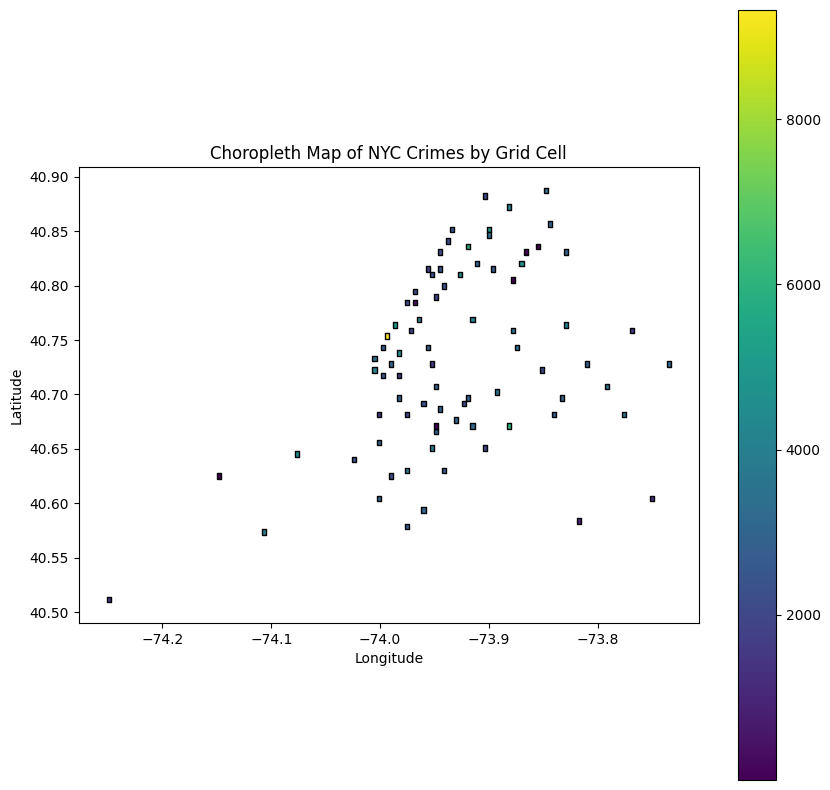

In [58]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Calculate the size of each grid cell
lat_step = (lat_max - lat_min) / grid_size
lon_step = (lon_max - lon_min) / grid_size

# Function to convert grid cell back to geographic coordinates
def grid_to_geom(grid_cell, lat_min, lon_min, lat_step, lon_step):
    lat_cell, lon_cell = map(int, grid_cell.strip('()').split(', '))
    return Polygon([
        (lon_min + lon_cell * lon_step, lat_min + lat_cell * lat_step),
        (lon_min + (lon_cell + 1) * lon_step, lat_min + lat_cell * lat_step),
        (lon_min + (lon_cell + 1) * lon_step, lat_min + (lat_cell + 1) * lat_step),
        (lon_min + lon_cell * lon_step, lat_min + (lat_cell + 1) * lat_step)
    ])

# Create a GeoDataFrame
geometry = [grid_to_geom(cell, lat_min, lon_min, lat_step, lon_step) for cell in crime_cell_counts['Grid_Cell']]
crime_gdf = gpd.GeoDataFrame(crime_cell_counts, geometry=geometry)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
crime_gdf.plot(column='Crime_Count', ax=ax, legend=True, cmap='viridis', edgecolor='black')
plt.title('Choropleth Map of NYC Crimes by Grid Cell')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [54]:
### NEW GRID CELLS APPROACH
grid_df = cleaned_df.copy()
# Define the grid size
grid_size = 100

# Determine the range from the crime data
lat_min, lat_max = crime_df['Latitude'].min(), crime_df['Latitude'].max()
lon_min, lon_max = crime_df['Longitude'].min(), crime_df['Longitude'].max()

# Define a function to assign to grid cells
def assign_to_grid(lat, lon, lat_min, lon_min, lat_step, lon_step):
    if lat < lat_min or lat > lat_max or lon < lon_min or lon > lon_max:
        return None  # Excludes points outside the crime data range
    lat_cell = int((lat - lat_min) // lat_step)
    lon_cell = int((lon - lon_min) // lon_step)
    return f'({lat_cell}, {lon_cell})'

# Calculate the step size for each grid cell
lat_step = (lat_max - lat_min) / grid_size
lon_step = (lon_max - lon_min) / grid_size

# Apply the grid cells to the business data
grid_df['grid_cell'] = grid_df.apply(lambda row: assign_to_grid(row['Latitude'], row['Longitude'], lat_min, lon_min, lat_step, lon_step), axis=1)
grid_df.head()

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,grid_cell
18,0365714-DCA,Business,03/31/2005,Inactive,04/08/1997,Garage,THE GARDENS 75TH STREET OWNERS CORP.,NaN,3538,75TH ST,...,25.0,4029562,4012740020,QN28,289.0,"Vehicle Spaces: 85, Bicycle Spaces:",-73.891136,40.750745,"(40.75074488262595, -73.89113569640881)","(63, 69)"
19,1076184-DCA,Business,12/31/2004,Inactive,04/02/2001,Tobacco Retail Dealer,"JALIL, MOHAMMED ABDUL",SUNRISE DELICATESSEN,2017,CHURCH AVE,...,40.0,3116556,3050810039,BK42,50801.0,NaN,-73.960737,40.650123,"(40.6501225946322, -73.96073707845565)","(36, 56)"
23,2061591-DCA,Business,12/31/2021,Inactive,11/25/2017,Laundries,SING WAH LAUNDROMAT INC.,NaN,6914,4TH AVE,...,43.0,3145701,3058720047,BK31,68.0,Laundry Type: Retail Laundry,-74.023621,40.634397,"(40.63439650603149, -74.02362065616948)","(32, 43)"
24,2009334-DCA,Business,05/23/2020,Inactive,06/09/2014,Sidewalk Cafe,DCB DELANCEY CORPORATION,SEL ROSE,1,DELANCEY ST,...,1.0,1005662,1004240012,MN27,18.0,Sidewalk Cafe Type: Regular Unenclosed/Small U...,-73.993820,40.720242,"(40.720241568328824, -73.99382027141543)","(55, 49)"
26,2038840-DCA,Business,07/31/2021,Inactive,06/09/2016,Secondhand Dealer - General,MD BROADWAY ELECTRONICS LLC,NaN,1888,JEROME AVE,...,14.0,2013962,2031790031,NaN,NaN,NaN,-73.906078,40.855206,"(40.85520587133494, -73.90607848934312)","(91, 66)"


In [55]:
crime_counts = clean_crime_df['grid_cell'].value_counts().reset_index()
crime_counts.columns = ['Grid_Cell', 'Crime_Count']
crime_counts.head()

,Grid_Cell,Crime_Count
0,"(65, 52)",1174
1,"(54, 49)",557
2,"(65, 81)",543
3,"(53, 49)",507
4,"(63, 73)",463


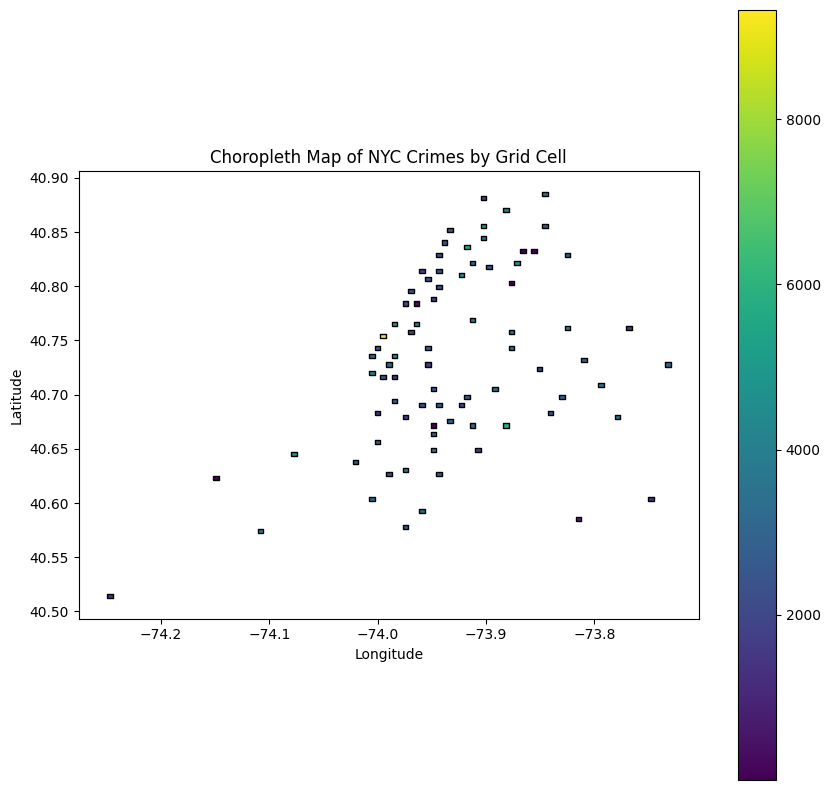

In [53]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Calculate the size of each grid cell
lat_step = (lat_max - lat_min) / grid_size
lon_step = (lon_max - lon_min) / grid_size

# Function to convert grid cell back to geographic coordinates
def grid_to_geom(grid_cell, lat_min, lon_min, lat_step, lon_step):
    lat_cell, lon_cell = map(int, grid_cell.strip('()').split(', '))
    return Polygon([
        (lon_min + lon_cell * lon_step, lat_min + lat_cell * lat_step),
        (lon_min + (lon_cell + 1) * lon_step, lat_min + lat_cell * lat_step),
        (lon_min + (lon_cell + 1) * lon_step, lat_min + (lat_cell + 1) * lat_step),
        (lon_min + lon_cell * lon_step, lat_min + (lat_cell + 1) * lat_step)
    ])

# Create a GeoDataFrame
geometry = [grid_to_geom(cell, lat_min, lon_min, lat_step, lon_step) for cell in crime_counts['Grid_Cell']]
crime_gdf = gpd.GeoDataFrame(crime_counts, geometry=geometry)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
crime_gdf.plot(column='Crime_Count', ax=ax, legend=True, cmap='viridis', edgecolor='black')
plt.title('Choropleth Map of NYC Crimes by Grid Cell')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [88]:
crime_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Grid_Lat,Grid_Lon
17,10361314,02/11/2006,16:35:00,NaN,(null),79.0,02/11/2006,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,40.689001,-73.945027,"(40.68900139556, -73.9450265328727)",PATROL BORO BKLYN NORTH,(null),45-64,BLACK,F,4069,31
18,10363948,02/11/2006,17:15:00,NaN,(null),83.0,02/11/2006,578,HARRASSMENT 2,638.0,...,40.698474,-73.917769,"(40.6984738177025, -73.917768981221)",PATROL BORO BKLYN NORTH,(null),18-24,BLACK,F,4070,34
44,16939015,05/30/2006,19:00:00,NaN,(null),44.0,06/29/2006,104,RAPE,157.0,...,40.837842,-73.919628,"(40.8378421209284, -73.9196277517392)",PATROL BORO BRONX,(null),<18,BLACK,F,4084,34
45,27139650,12/15/2006,21:12:00,NaN,(null),83.0,02/27/2007,114,ARSON,263.0,...,40.698474,-73.917769,"(40.6984738177025, -73.917768981221)",PATROL BORO BKLYN NORTH,(null),(null),UNKNOWN,M,4070,34
48,45954344,04/24/2008,17:45:00,NaN,(null),52.0,04/24/2008,109,GRAND LARCENY,419.0,...,40.869470,-73.879861,"(40.8694704770483, -73.8798608037303)",PATROL BORO BRONX,(null),18-24,BLACK,F,4087,38


In [50]:
grid_df.columns

NameError: ignored

In [ ]:
clean_crime_df = grid_df.drop(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM','RPT_DT','PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM','JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD','TRANSIT_DISTRICT','Lat_Lon', 'PATROL_BORO', 'STATION_NAME'], axis=1)

In [ ]:
clean_crime_df.to_csv('clean_crime_data.csv', index=False)

In [ ]:
clean_crime_df.head(10)

,ADDR_PCT_CD,KY_CD,OFNS_DESC,PD_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Grid_Lat,Grid_Lon,grid_cell
44,44.0,104,RAPE,157.0,INSIDE,HOTEL/MOTEL,18-24,UNKNOWN,M,40.837842,-73.919628,<18,BLACK,F,34,34,"(20795, -27805)"
45,83.0,114,ARSON,263.0,REAR OF,OTHER,(null),(null),(null),40.698474,-73.917769,(null),UNKNOWN,M,20,34,"(20770, -27805)"
48,52.0,109,GRAND LARCENY,419.0,INSIDE,STREET,18-24,BLACK,M,40.869470,-73.879861,18-24,BLACK,F,37,38,"(20801, -27796)"
51,52.0,105,ROBBERY,361.0,INSIDE,BANK,25-44,BLACK,M,40.869470,-73.879861,(null),UNKNOWN,D,37,38,"(20801, -27796)"
52,47.0,114,ARSON,261.0,INSIDE,GROCERY/BODEGA,(null),(null),(null),40.887314,-73.847272,(null),UNKNOWN,E,39,41,"(20804, -27788)"
53,115.0,113,FORGERY,723.0,(null),STREET,(null),(null),(null),40.756568,-73.875932,(null),UNKNOWN,E,26,38,"(20780, -27795)"
58,106.0,114,ARSON,263.0,REAR OF,OTHER,(null),(null),(null),40.682398,-73.840072,(null),UNKNOWN,E,19,42,"(20767, -27786)"
59,47.0,105,ROBBERY,397.0,FRONT OF,BUS STOP,(null),UNKNOWN,M,40.887314,-73.847272,<18,BLACK,M,39,41,"(20804, -27788)"
65,41.0,117,DANGEROUS DRUGS,503.0,(null),STREET,(null),(null),(null),40.816206,-73.896001,(null),UNKNOWN,E,32,36,"(20791, -27800)"
69,40.0,364,(null),808.0,(null),STREET,(null),(null),(null),40.810352,-73.924942,(null),UNKNOWN,E,31,33,"(20790, -27807)"


In [ ]:
print(clean_crime_df.OFNS_DESC.value_counts())
print(clean_crime_df.KY_CD.value_counts())

GRAND LARCENY                      507632
ROBBERY                            212507
FELONY ASSAULT                     161683
GRAND LARCENY OF MOTOR VEHICLE     142247
CRIMINAL MISCHIEF & RELATED OF     110058
BURGLARY                            94577
MISCELLANEOUS PENAL LAW             84005
FORGERY                             75337
DANGEROUS DRUGS                     68608
DANGEROUS WEAPONS                   57602
THEFT-FRAUD                         13614
POSSESSION OF STOLEN PROPERTY       13200
ARSON                                7790
NYS LAWS-UNCLASSIFIED FELONY         6520
SEX CRIMES                           5662
RAPE                                 4182
KIDNAPPING & RELATED OFFENSES         930
MURDER & NON-NEGL. MANSLAUGHTER       852
(null)                                498
OTHER STATE LAWS (NON PENAL LA        218
CHILD ABANDONMENT/NON SUPPORT         195
PROSTITUTION & RELATED OFFENSES       160
HOMICIDE-NEGLIGENT-VEHICLE            120
GAMBLING                          

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def oneHotCode_cols(df):
    df_transformed = pd.DataFrame()
    for col in df.columns:
        # Check if the column is of object or category type
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Initialize the OneHotEncoder
            encoder = OneHotEncoder(sparse=False, drop='first')

            # Fit and transform the column and convert it to a DataFrame
            one_hot_encoded = encoder.fit_transform(df[[col]])
            one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([col]))

            # Concatenate the one-hot-encoded DataFrame to the transformed DataFrame
            df_transformed = pd.concat([df_transformed, one_hot_df], axis=1)
        else:
            # If the column is not categorical, just copy it to the transformed DataFrame
            df_transformed[col] = df[col].copy()
    return df_transformed

In [ ]:
oneHotCode_cols(clean_crime_df)

NameError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_chunks(df, chunk_size=10000):
    # Create an empty dictionary to hold the transformed chunks
    transformed_chunks = []

    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Determine the categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Fit the encoder on the entire dataset for categorical columns
    # This is necessary to ensure consistent feature names across chunks
    encoder.fit(df[categorical_columns])

    # Process each chunk
    for start in range(0, df.shape[0], chunk_size):
        # Select the chunk of data
        end = min(start + chunk_size, df.shape[0])
        chunk = df[start:end]

        # One-hot encode the chunk
        one_hot_encoded = encoder.transform(chunk[categorical_columns])
        one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

        # Drop original categorical columns and concat the one-hot-encoded columns
        chunk = chunk.drop(columns=categorical_columns).reset_index(drop=True)
        chunk_transformed = pd.concat([chunk, one_hot_df], axis=1)

        # Append the transformed chunk to the list
        transformed_chunks.append(chunk_transformed)

    # Concatenate all transformed chunks
    df_transformed = pd.concat(transformed_chunks, ignore_index=True)

    return df_transformed

# Usage:
# crime_data_transformed = one_hot_encode_chunks(crime_data)


In [ ]:
crime_encoded = one_hot_encode_chunks(clean_crime_df, 10000)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
